In [9]:
import src
import os
import numpy as np
import sys
import re
import math
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(0, 'C:/Users/pkicsiny/Desktop/TUM/3/ADL4CV/ADL4CV_project/models')

In [10]:
os.listdir(sys.path[0])

['sgan_2-1', 'sgan_2-1_iw', 'sgan_2-1_w', 'tgan_2-1', 'unet_2-1']

In [11]:
scores = {}
for model in os.listdir(sys.path[0]):
    try:
        scores[model] = np.load(sys.path[0]+"/"+model+"/"+model+"_scores.npy")
    except:
        pass

In [12]:
scores.keys()

dict_keys(['sgan_2-1', 'sgan_2-1_iw', 'sgan_2-1_w', 'tgan_2-1', 'unet_2-1'])

In [13]:
scores['sgan_2-1_iw'].item().keys()

dict_keys(['pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5'])

In [14]:
result = {}
for model in scores.keys():
    result[model] = pd.DataFrame(
        data=[pd.DataFrame(scores[model].item()[key]).mean() for key in scores[model].item().keys()],
        index=scores[model].item().keys())#.groupby(['corr_to_input', 'corr_to_truth'])

In [15]:
result["sgan_2-1_w"]

,corr_to_input,corr_to_truth,csi,far,pod
pred_1,0.186951,0.176242,0.060228,0.922667,0.263047
pred_2,0.202568,0.188747,0.056994,0.930796,0.332566
pred_3,0.219741,0.200627,0.052136,0.939977,0.421934
pred_4,0.227934,0.211601,0.047987,0.946926,0.525442
pred_5,0.226111,0.214665,0.044815,0.952066,0.576983


In [16]:
result["tgan_2-1"]

,corr_to_input,corr_to_truth,csi,far,pod
pred_1,0.419722,0.408843,0.158531,0.648910,0.240742
pred_2,0.286258,0.284586,0.098920,0.777811,0.173009
pred_3,0.226415,0.223684,0.072718,0.844066,0.148683
pred_4,0.203311,0.197327,0.060857,0.874601,0.136485
pred_5,0.196053,0.177254,0.053631,0.890401,0.131908


In [17]:
result["sgan_2-1_iw"]

,corr_to_input,corr_to_truth,csi,far,pod
pred_1,0.409206,0.410163,0.188616,0.718756,0.358118
pred_2,0.318773,0.311407,0.130447,0.816999,0.312007
pred_3,0.273009,0.254172,0.100965,0.864144,0.285470
pred_4,0.249420,0.219789,0.077151,0.897657,0.267342
pred_5,0.227176,0.187915,0.059681,0.920601,0.247205


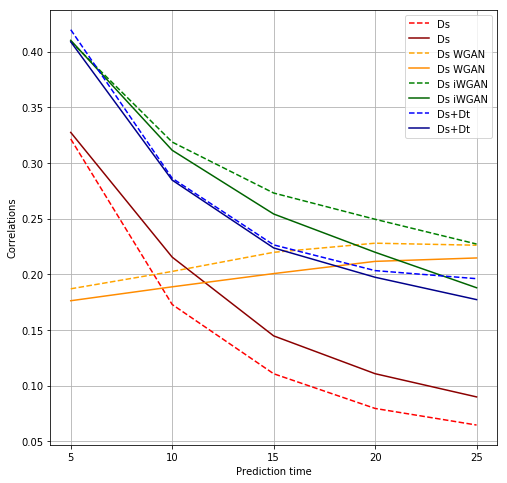

In [26]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
ax1.plot(result["sgan_2-1"]["corr_to_input"], label="Ds", linestyle='--',c="r")
ax1.plot(result["sgan_2-1"]["corr_to_truth"], label="Ds", c="darkred")

ax1.plot(result["sgan_2-1_w"]["corr_to_input"], label="Ds WGAN", linestyle='--',c="orange")
ax1.plot(result["sgan_2-1_w"]["corr_to_truth"], label="Ds WGAN", c="darkorange")

ax1.plot(result["sgan_2-1_iw"]["corr_to_input"], label="Ds iWGAN", linestyle='--',c="g")
ax1.plot(result["sgan_2-1_iw"]["corr_to_truth"], label="Ds iWGAN", c="darkgreen")

ax1.plot(result["tgan_2-1"]["corr_to_input"], label="Ds+Dt", linestyle='--',c="b")
ax1.plot(result["tgan_2-1"]["corr_to_truth"], label="Ds+Dt", c="darkblue")
ax1.grid()
ax1.set_xticklabels(["5", "10", "15", "20", "25"])
ax1.set_xlabel("Prediction time")
ax1.set_ylabel("Correlations")
ax1.legend(loc="upper right")
plt.savefig("corrs")

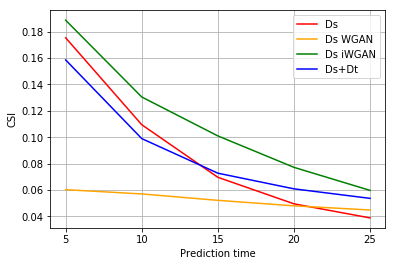

In [19]:
fig, ax2 = plt.subplots(1,1)
ax2.plot(result["sgan_2-1"]["csi"], label="Ds",c="r")
ax2.plot(result["sgan_2-1_w"]["csi"], label="Ds WGAN",c="orange")
ax2.plot(result["sgan_2-1_iw"]["csi"], label="Ds iWGAN",c="g")
ax2.plot(result["tgan_2-1"]["csi"], label="Ds+Dt",c="b")

ax2.set_xlabel("Prediction time")
ax2.set_ylabel("CSI")
ax2.grid()
ax2.set_xticklabels(["5", "10", "15", "20", "25"])
ax2.legend()
plt.savefig("csi")

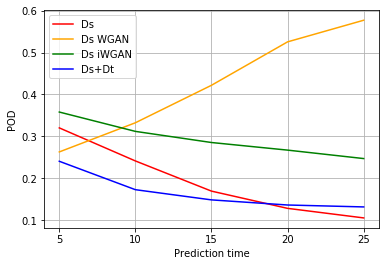

In [20]:
fig, ax2 = plt.subplots(1,1)
ax2.plot(result["sgan_2-1"]["pod"], label="Ds",c="r")
ax2.plot(result["sgan_2-1_w"]["pod"], label="Ds WGAN",c="orange")
ax2.plot(result["sgan_2-1_iw"]["pod"], label="Ds iWGAN",c="g")
ax2.plot(result["tgan_2-1"]["pod"], label="Ds+Dt",c="b")

ax2.set_xlabel("Prediction time")
ax2.set_ylabel("POD")
ax2.grid()
ax2.set_xticklabels(["5", "10", "15", "20", "25"])
ax2.legend()
plt.savefig("pod")

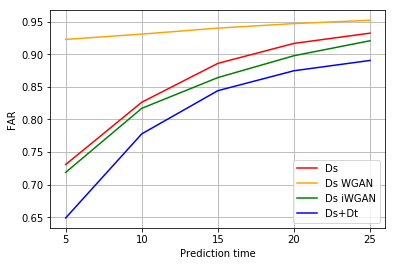

In [21]:
fig, ax2 = plt.subplots(1,1)
ax2.plot(result["sgan_2-1"]["far"], label="Ds",c="r")
ax2.plot(result["sgan_2-1_w"]["far"], label="Ds WGAN",c="orange")
ax2.plot(result["sgan_2-1_iw"]["far"], label="Ds iWGAN",c="g")
ax2.plot(result["tgan_2-1"]["far"], label="Ds+Dt",c="b")

ax2.set_xlabel("Prediction time")
ax2.set_ylabel("FAR")
ax2.grid()
ax2.set_xticklabels(["5", "10", "15", "20", "25"])
ax2.legend()
plt.savefig("far")